# Introduction

For this project, you will act as a data researcher for the **I**nternational **H**eadquarter of **E**mpathy **A**nd **L**ogic (**IHEAL**) . You will be helping them analyze data on GDP and life expectancy from the World Health Organization and the World Bank to support their case that there is a correlation or pattern between the GDP and life expectancy of a country.

To quote the Vice President of Intuition and Systems at **IHEAL:**

> "We know in our hearts and minds that there is an unjust connection between the wealth of a nation, and the life of its people, but we can't get buy in from the people in power without the data to support this."

During this project, you will analyze, prepare, and plot data,  and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating a blog post to share on the **IHEAL** website.

**BIG Question**: Is there a correlation between GDP and life expectancy of a country?

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](vhttp://apps.who.int/gho/data/node.main.688)


## Step 1

Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2

Load the dataset and inspect it:

In [5]:
gdp_life = pd.read_csv('all_data.csv')
print(gdp_life.head())
print(gdp_life.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


## Step 3

Use Pandas to change the name of the column "Life expectancy at birth (years)" to LEABY.

(Hint: Use .rename()

In [6]:
gdp_life.rename(columns={"Life expectancy at birth (years)": "LEABY"}, inplace=True)
print(gdp_life.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


## Step 4

Using Pandas rearrange the columns so that Year is the second (named) column in gdp. Then check your work with .head().

In [14]:
gdp_life = gdp_life[["Country", "Year", "GDP", "LEABY"]]
gdp_life.head()

,Country,Year,GDP,LEABY
0,Chile,2000,7.786093e+10,77.3
1,Chile,2001,7.097992e+10,77.3
2,Chile,2002,6.973681e+10,77.8
3,Chile,2003,7.564346e+10,77.9
4,Chile,2004,9.921039e+10,78.0


## Step 5

We want to compare the GDPs of the countries over time, in order to eventually look for correlation between GDP and life expectancy. 

Plot the `gdp` DataFrame on a Seaborn `.pointplot()`


Start by setting the variables `f, ax` equal to `plt.subplots()`. This will instantiate a figure and give us access to the axes through the variable name `ax`. 

Then, set the size of the figure to 15x6 by passing `figsize=(15, 6)` to `plt.subplots()`.


The syntax for a Seaborn point plot is:
```python
sns.pointplot(x="", y="", hue = "", data=)
```
Create a point plot from the DataFrame `gdp`, using the "Year" column for the `x` argument, the "GDP" column for the `y` argument, and the "Country" column for the `hue` argument. Use the variable `ax` for your plot, like this:
```python
ax = sns.pointplot()
```


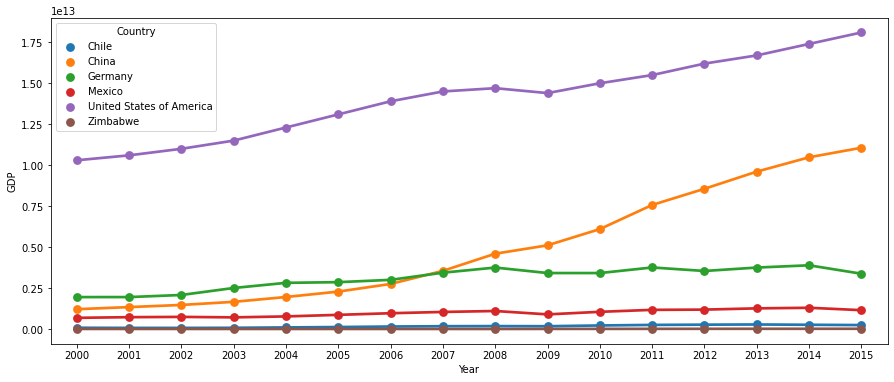

In [9]:
f, ax = plt.subplots(figsize=(15, 6)) 
ax = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp_life)

The years across the x-axes are difficult to read because there are so many values. One way to address this issue is to rotate the tick labels. Rotate the x-axes tick labels in your plot using `plt.xticks(rotation=70)`

Also set the label of the y-axis using the following line of code:
`ax.set(ylabel="GDP in Trillions of U.S. Dollars")`

[Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')]

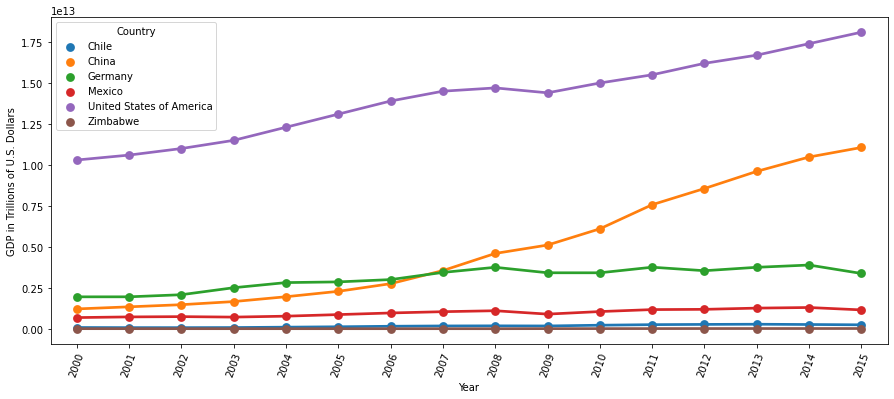

In [10]:
f, ax = plt.subplots(figsize=(15, 6)) 
ax = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp_life)
plt.xticks(rotation=70)

ax.set(ylabel="GDP in Trillions of U.S. Dollars")

Because the values of GDP are so high, the tick labels on the y-axis can be a little confusing. You can reformat the values to be in trillions using the code we've put in the cell for you below. Run the code to see the difference.

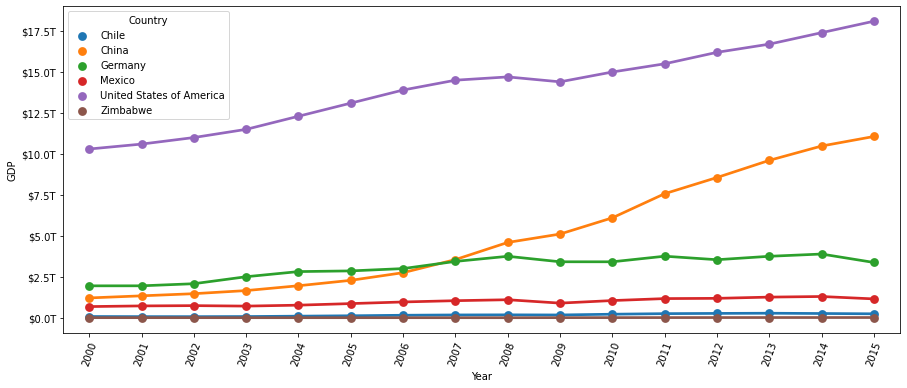

In [11]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)


f, ax = plt.subplots(figsize=(15, 6)) 
ax = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp)
plt.xticks(rotation=70)
ax.yaxis.set_major_formatter(formatter)


What are your first impressions looking at the visualized data?


- Which countries' line changes the most? - USA
- What years are there the biggest changes in the data? between 2007 and 2015 
- Which country has had the least change in GDP over time? Zimbabwe

## Step 6

To compare GDP and life expectancy over time we also need to plot the life expectancy data. 

Start again by  setting the variables `f, ax ` equal to `plt.subplots()`. Set the size of the figure to 12x6.

Create a point plot from the DataFrame `life`, using the "Year" column for the `x` argument, the "LEABY" column for the `y` argument, and the "Country" column for the `hue` argument. Use the variable `ax` for your plot, like this:
```python
ax = sns.pointplot()
```

Set the y-axis label back to "Life expectancy at birth (years)" using `ax.set()`.

[Text(0, 0.5, 'Life expectancy at birth (years)')]

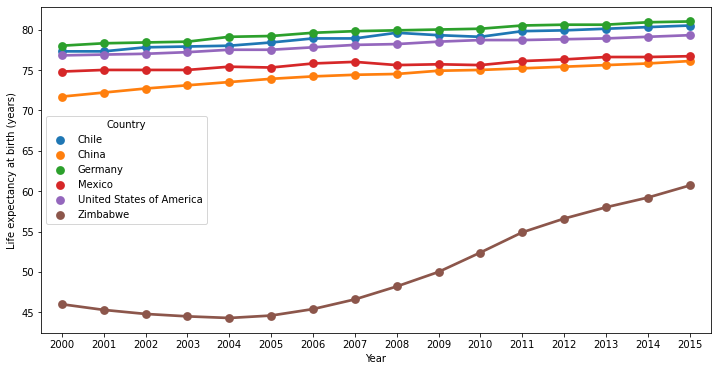

In [12]:
f, ax = plt.subplots(figsize=(12, 6)) 
ax = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=gdp_life)
ax.set(ylabel="Life expectancy at birth (years)")

What are your first impressions looking at the visualized data?

- Which countries' line changes the most? Zimbabwe
- What years are there the biggest changes in the data? 2007 - 2015
- Which country has had the least change in life expectancy over time? Mexiko

## Step 7

Create a figure with two subplots, divided into 2 rows and 1 column. 

- We have set up the code for you on line 1 in the cell below. Complete the figure by passing the following arguments to `plt.subplots()`
    - `2`-- the number of rows for the subplots
    - `1` -- the number of columns for the subplots
    - `figsize=(15, 15)` -- the size of the figure


Use the DataFrame to create point plots for the GDP and Life expectancy over the same 16 years.

The code for `pointplot()` will be the same as you have previously used in this project, with the addition of the `ax` argument which can be added after the `data` argument.
- Set the `ax` argument for one `pointplot()` to `ax1`, and the other to `ax2`.

You can also give each plot a title using
- `ax2.set_title("")`
- `ax1.set_title("")`

Text(0.5, 1.0, 'Life Expectancy In Years Over Time')

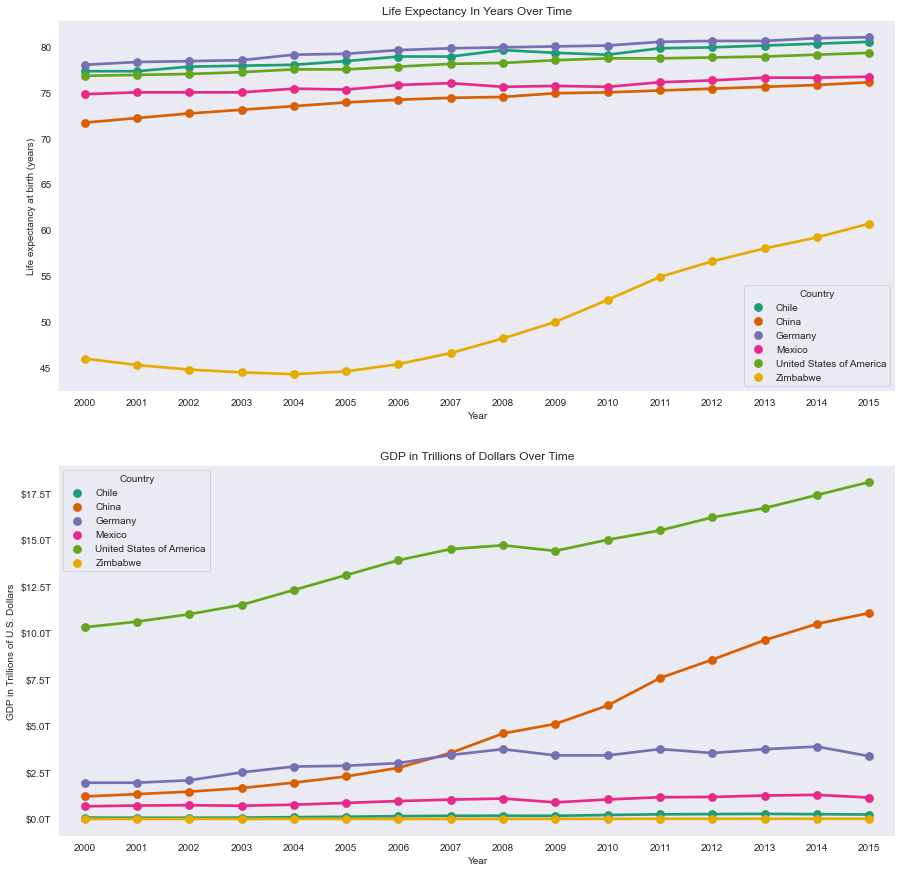

In [15]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

sns.set_style("dark")
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15, 15) )
sns.set_palette("Dark2")
ax1 = sns.pointplot(x="Year", y="LEABY", hue = "Country", data=gdp_life, ax=ax1)
ax2 = sns.pointplot(x="Year", y="GDP", hue = "Country", data=gdp_life, ax=ax2)
ax2.yaxis.set_major_formatter(formatter)
ax1.set(ylabel="Life expectancy at birth (years)")
ax2.set(ylabel="GDP in Trillions of U.S. Dollars")
ax2.set_title("GDP in Trillions of Dollars Over Time")
ax1.set_title("Life Expectancy In Years Over Time")

